Name- Rupam Das

Task 5- Sales Prediction Using Python

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Advertising.csv") #READING THE DATASET

In [59]:
df.head() #RETURNS FIRST 5 ENTRIES

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [60]:
df.tail() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [61]:
df.shape

(200, 5)

In [62]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [64]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [65]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

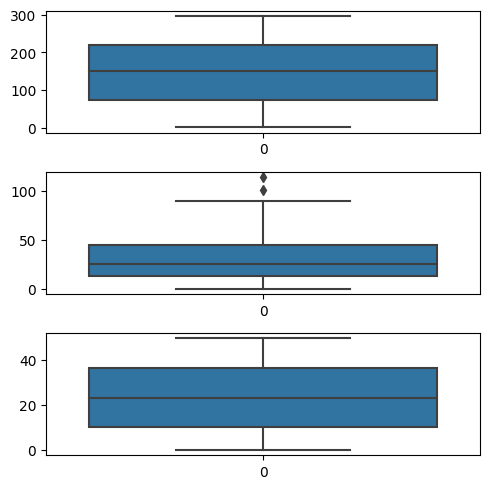

In [67]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [68]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [69]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) +(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [70]:
data = df.copy()

In [71]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:>

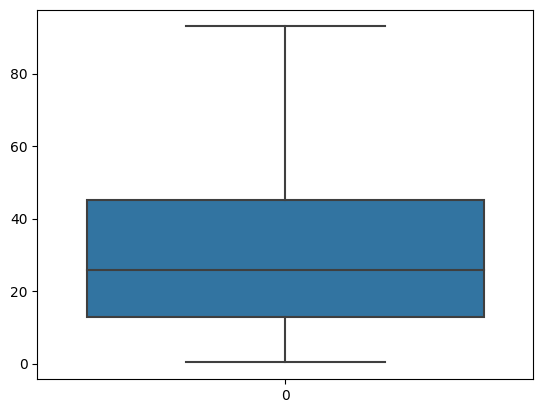

In [72]:
sns.boxplot(data['Newspaper'])

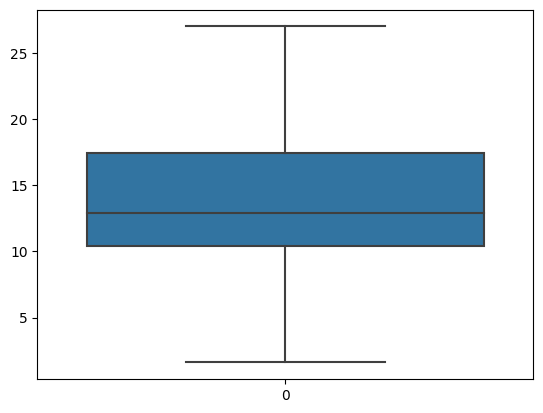

In [73]:
sns.boxplot(data['Sales']);

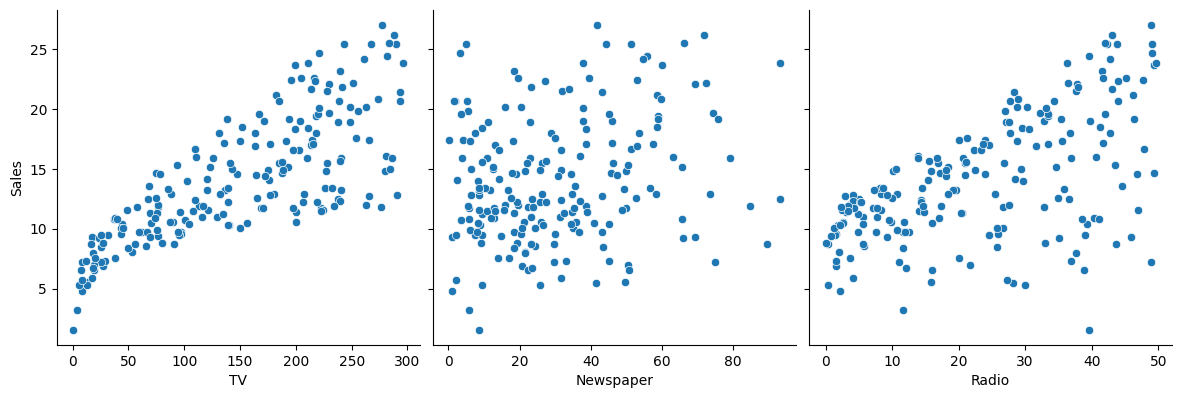

In [74]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [75]:
imp_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']>-0.5)].index)

In [76]:
print(imp_features)

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


In [77]:
x = data['TV']
y = data['Sales']

In [78]:
X = x.values.reshape(-1,1)

In [79]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [80]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [81]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [82]:
print(X.shape,y.shape)

(200, 1) (200,)


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [84]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [85]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor

In [86]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn

KNeighborsRegressor()

In [87]:
knn_train_pred = knn.predict(X_train)

In [88]:
knn_test_pred = knn.predict(X_test)

In [89]:
print(knn_train_pred, knn_test_pred)

[19.76 12.84 21.56 20.   17.06 17.06 11.6  20.82 16.12 18.92 19.86 15.1
 11.1   7.78 16.28  7.78 12.34 19.34 19.76 11.1  13.9  21.56 16.28 16.52
 19.66  7.78  9.66 14.28 18.82 13.48 10.8  12.1  21.3  15.24 17.86 12.14
 12.78 16.28 13.48 16.98 15.5  13.66 21.3  14.6  15.5  18.82  9.86 10.8
 21.44  8.64  7.42 12.1  17.1  10.8  21.44 16.06 19.24 20.82 14.34 13.76
 19.24 14.6   8.64 11.22  9.78 10.7   7.78 14.34 20.82 17.92 18.9  11.22
 12.34 19.24 17.1  13.48  8.18 13.36 12.78 13.08 22.26  9.86 19.88 19.34
 12.1  19.3  12.94 13.3  20.88  9.86  8.18 11.92  8.64 12.08 14.18 13.3
 18.3   7.42 15.76  9.66 11.6  21.56 21.4  17.06 16.28 12.1   8.64 11.1
 16.28 13.08 11.1  18.92 20.   17.1  10.56 14.18 13.76  9.86 17.1  13.88
 14.34 10.18 13.3  13.08 18.3   9.38 19.66 15.6  19.86 14.98  7.78  7.42
 19.76 17.92] [ 9.38 21.4  17.18 12.1   7.42 20.    7.7   7.42 19.3  15.5  21.44 12.1
  9.78  8.18 20.88 11.6   7.78 15.46  9.86  7.42 10.8   7.42 19.86 16.28
 15.1  10.18  7.7  17.06 12.34 18.92 19.04

In [90]:
Results = pd.DataFrame(columns=["Model","Train R2", "Test R2", "Test RMSE", "Variance"])

In [91]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance


In [92]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [93]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [94]:
print(svr_train_pred,svr_test_pred)

[17.70097784 12.15673254 20.25158346 16.60005458 19.09898504 19.05605652
 11.48697183 20.01401031 18.89570981 19.19854553 19.35334662 13.11407976
 11.82316066  8.82319848 15.86562874  8.80233282 13.49352723 17.12742192
 17.65418425 11.72757815 14.72220803 20.24723596 15.67679777 18.75776783
 16.49961248  8.80031941 10.04092657 18.26271735 20.25225034 14.45945926
 10.66556303 10.94237673 20.15819542 18.16048025 17.99188837 10.79974851
 12.62051671 15.85927065 14.51986177 16.07122273 15.12559192 13.36382154
 20.14066129 13.2633339  15.20070291 20.25175722  9.24665779 10.58862455
 19.58984624  8.90026938  8.79757637 10.88075211 18.53068837 10.55975119
 19.69237424 15.42564025 20.03244743 20.09709859 13.91038502 12.75538579
 20.06687856 13.3003195   8.90207782 11.9928928   9.70404593 10.26709074
  8.81438745 13.8375704  20.08181943 17.39169469 17.85380973 12.08331011
 13.45497414 20.07156778 18.60346948 14.57599758  8.93487    18.37617266
 12.73769523 13.41296409 20.19032629  9.41914703 17

In [95]:
import statsmodels.api as sm

In [96]:
X_train_constant = sm.add_constant(X_train)

In [97]:
model = sm.OLS(y_train, X_train_constant).fit()

In [98]:
model.params

const    7.515921
x1       0.046745
dtype: float64

In [99]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.05e-26
Time:                        20:25:55   Log-Likelihood:                -349.81
No. Observations:                 134   AIC:                             703.6
Df Residuals:                     132   BIC:                             709.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5159      0.605     12.422      0.0

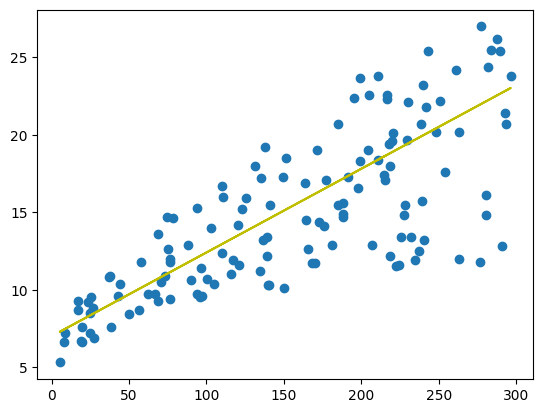

In [100]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [101]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)

In [102]:
res

168   -0.484860
143   -2.005480
102   -5.813956
70     1.477088
104    2.049347
         ...   
118    2.508194
119   -1.822780
78    -2.468346
52     4.968394
59     1.034843
Name: Sales, Length: 134, dtype: float64

In [103]:
y_train_pred

array([17.58486035, 12.40548026, 20.6139563 , 16.82291184, 18.65065337,
       18.61325712, 11.64353174, 21.37123028, 18.47769573, 18.73946946,
       18.88437991, 13.64423091, 12.01281967,  8.4321291 , 16.29936439,
        8.31994036, 14.12103305, 17.18752524, 17.55213864, 11.90530546,
       15.38783089, 20.67005066, 16.15912847, 18.36550699, 16.75279388,
        8.30591677, 10.20377626, 17.98687   , 20.45969678, 15.14942982,
       10.81613979, 11.08726258, 21.05803672, 17.91207751, 17.79053971,
       10.94702666, 12.99447114, 16.29468986, 15.20552419, 16.44894938,
       15.72907164, 13.96209901, 21.10478203, 13.83588667, 15.78984054,
       20.45034772,  9.30159182, 10.7413473 , 19.12745551,  8.68455376,
        7.92260525, 11.02649368, 18.18787482, 10.71330012, 19.24431878,
       15.96747271, 19.73046998, 21.2076217 , 14.59783519, 13.1721033 ,
       19.79591341, 13.88263198,  8.68922829, 12.20914997,  9.85318646,
       10.42815374,  8.39005832, 14.51836817, 21.24034342, 17.36

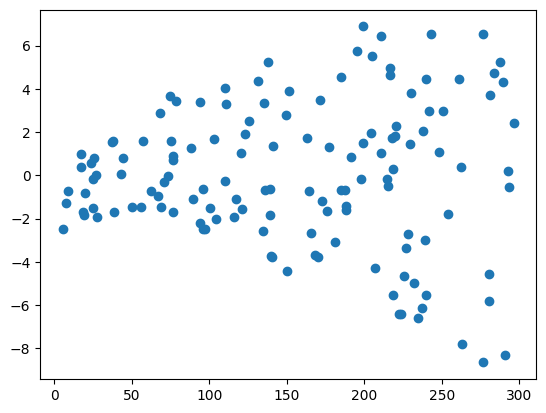

In [104]:
plt.scatter(X_train,res)
plt.show()

In [105]:
X_test_constant=sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [106]:
y_pred

array([ 9.60543632, 20.80561206, 16.54711452, 11.03584274,  7.54864278,
       16.85563355,  8.1282846 ,  7.70757683, 16.98184588, 13.56476389,
       19.14615363, 11.0451918 ,  9.77371943,  8.85283687, 19.45467266,
       11.5921119 ,  8.39473285, 14.83623626,  9.53064383,  7.85716182,
       10.75069636,  7.90858165, 17.49604427, 17.81391236, 13.6722781 ,
       12.07358857,  8.13295913, 18.61325712, 14.19582554, 18.72544586,
       19.9922437 ,  8.35266208, 10.68525293, 15.78984054, 11.52199394,
        8.31994036, 16.75279388,  7.91793072, 17.91207751, 19.91277668,
       10.60578591, 19.9314748 , 13.13470706,  8.06284117, 15.70102445,
       10.01679503,  8.98839826, 17.49136974, 20.31011179, 11.26489475,
       16.05161426, 12.79346631, 10.30194141, 16.85563355, 16.57048718,
       18.73946946, 15.15877888,  9.36236072, 17.31373757, 14.4015049 ,
       18.17385123, 12.53636712, 17.18285071, 11.74169689, 20.88507908,
       15.3130384 ])

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.204747026930621

In [109]:
r2 = r2_score(y_test, y_pred)

In [110]:
r2

0.6126299898456484

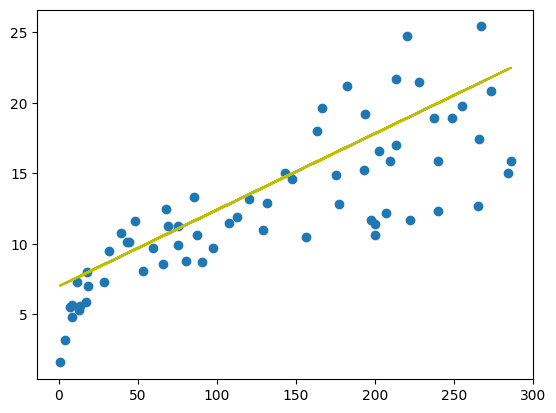

In [111]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')